In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import re

import seaborn as sns
from matplotlib.font_manager import FontProperties
import matplotlib.ticker as ticker

In [90]:
COLUMNS_NEW_NAMES = {
                      'BUST_Circ': 'chest_girth', 
                      'NaturalWAIST_Circ': 'waist_girth',
                      'Hip_2_Circ': 'hips_buttock_girth', 
                      'Thigh_Circ': 'thigh_girth',
                      'CROTCH_Height': 'crotchheight_length', 
                      'Shoulder_to_Wrist': 'sleeveoutseam_length', 
                      'shoulder_girth': 'shoulder_girth',
                      'NeckBase_Circ': "neck_base_girth",
                      'Ankle_Circ': "ankle_girth",
                      'Calf_Circ': "calf_girth",
                      'Wrist_Circ': "wrist_girth",
                      'Elbow_Circ': "forearm_girth",

                      'CHEST_Circ': 'chest_girth',
                      'TrouserWAIST_Circ': 'waist_girth',
                      'HIP_Circ': 'hips_buttock_girth', 
                    }

PRIM_MEAS = [
            'index',
            'stature_cm',
            'chest_girth',
            'waist_girth',
            'hips_buttock_girth',
            'thigh_girth',
            'sleeveoutseam_length',
            'crotchheight_length'
          ]

GENDERS = ['female', 'male']

BM_DIR = "/media/jesus/GSUS-DATA/CANADA_docs/3D_human_avatar_Mitacs/" \
         "NN_silhouettes_SPRING-ANSUR/Papers_NN_measurements/" \
         "SilhouetteBodyMeasurementBenchmarks"

AVA_DIR =  os.path.join(BM_DIR, "smpl6890v_lbfgsb_fits")   #female

# Load and use data

## Load data

In [91]:
NUM_CAT = False   ## whether the model was trained with numeric + categorical data
AUGMENTATION_Model = True  ## whether the model was trained with image augmentation


FIT_ALG = "nicp"  # "nicp"   #"nicp"  # "lbfgsb"
# BENCHMARK_AVA_DIR = f'/media/jesus/GSUS-DATA/CANADA_docs/3D_human_avatar_Mitacs/2photos-to-3Davatar/benchmark_files/benchmark_ava_{FIT_ALG}'
# BENCHMARK_AVA_DIR = '/media/jesus/GSUS-DATA/CANADA_docs/3D_human_avatar_Mitacs/2photos-to-3Davatar/benchmark_files/benchmark_ava_v0_onlyZoom'

# ## Dataset - benchmark
# df_female_clean = pd.read_csv('benchmark_measurements_2compare_female.csv')
# df_male_clean = pd.read_csv('benchmark_measurements_2compare_male.csv')

## Avatars - benchmark
df_female_ava_bm = pd.read_csv(f'measurements_benchmark_{FIT_ALG}_female.csv')
df_male_ava_bm = pd.read_csv(f'measurements_benchmark_{FIT_ALG}_male.csv')

if NUM_CAT == True and AUGMENTATION_Model == True:
    BENCHMARK_AVA_DIR = f'/media/jesus/GSUS-DATA/CANADA_docs/3D_human_avatar_Mitacs/2photos-to-3Davatar/benchmark_files/benchmark_ava_{FIT_ALG}'
elif NUM_CAT == False and AUGMENTATION_Model == True:
    BENCHMARK_AVA_DIR = f'/media/jesus/GSUS-DATA/CANADA_docs/3D_human_avatar_Mitacs/2photos-to-3Davatar/benchmark_files/benchmark_ava_{FIT_ALG}_noNumCat'

## Avatars - generated
df_female_ava_gen = pd.read_csv(os.path.join(BENCHMARK_AVA_DIR, f'benchmark_avatars_measurements_{FIT_ALG}_female.csv'))
df_male_ava_gen = pd.read_csv(os.path.join(BENCHMARK_AVA_DIR, f'benchmark_avatars_measurements_{FIT_ALG}_male.csv'))

## NN - extracted
df_female_nn_gen = pd.read_csv(os.path.join(BENCHMARK_AVA_DIR, f'benchmark_extracted_measurements_{FIT_ALG}_female.csv'))
df_male_nn_gen = pd.read_csv(os.path.join(BENCHMARK_AVA_DIR, f'benchmark_extracted_measurements_{FIT_ALG}_male.csv'))

df_female_nn_gen = df_female_nn_gen.drop("weight_kg", axis=1)
df_male_nn_gen = df_male_nn_gen.drop("weight_kg", axis=1)

In [92]:
display(
    df_female_ava_gen.head(5),
    df_female_nn_gen.head(5),
)

,index,stature_cm,neck_base_girth,chest_girth,waist_girth,hips_buttock_girth,shoulder_girth,thigh_girth,thigh_low_girth,calf_girth,...,forearm_girth,wrist_girth,shoulder_length,sleeveoutseam_length,forearm_length,crotchheight_length,waistback_length,thigh_length,chest_depth_length,head_girth
0,0,147.83,33.68,85.01,73.32,89.23,90.75,52.48,34.50,32.40,...,22.93,13.85,11.95,48.12,21.18,70.32,36.25,34.05,21.92,53.49
1,1,157.86,36.09,92.07,80.78,97.71,99.50,58.15,38.23,35.67,...,25.20,14.87,13.11,52.30,23.17,76.09,39.15,36.75,24.03,55.28
2,2,154.79,34.24,81.80,69.77,83.96,93.83,49.17,32.70,31.54,...,22.97,14.25,12.93,51.59,22.67,74.41,39.11,36.04,20.72,54.34
3,3,145.34,35.01,90.29,77.62,87.78,96.22,51.51,34.05,32.49,...,23.72,14.17,12.57,47.22,20.80,67.66,36.68,33.29,23.36,53.84
4,4,147.74,34.10,86.20,74.69,88.65,92.46,51.93,34.35,32.46,...,23.13,13.98,12.22,47.63,20.93,69.24,37.48,33.72,22.25,53.53


,index,stature_cm,chest_girth,waist_girth,hips_buttock_girth,thigh_girth,sleeveoutseam_length,waistback_length,shoulder_girth,crotchheight_length
0,0,0.0,86.44,75.95,91.36,52.78,48.97,36.06,91.64,70.45
1,1,0.0,92.71,81.08,97.51,58.39,51.85,38.99,100.36,75.22
2,2,0.0,77.23,64.67,80.31,45.85,49.99,39.13,89.86,73.03
3,3,0.0,92.03,80.38,89.14,52.00,47.68,36.31,98.01,67.69
4,4,0.0,84.34,73.45,87.64,50.36,46.55,37.47,89.71,67.47


In [93]:
display(
    df_male_ava_gen.head(5),
    df_male_nn_gen.head(5),
)

,index,stature_cm,neck_base_girth,chest_girth,waist_girth,hips_buttock_girth,shoulder_girth,thigh_girth,thigh_low_girth,calf_girth,...,forearm_girth,wrist_girth,shoulder_length,sleeveoutseam_length,forearm_length,crotchheight_length,waistback_length,thigh_length,chest_depth_length,head_girth
0,0,160.10,38.73,90.30,79.35,90.15,104.10,52.81,36.04,34.86,...,26.90,15.87,13.52,53.21,24.21,76.35,40.21,36.97,21.08,55.51
1,1,168.40,40.58,95.69,84.42,92.66,110.26,54.14,37.15,35.94,...,28.22,16.60,14.42,55.58,25.17,79.81,45.87,38.70,22.68,56.36
2,2,155.50,38.40,89.16,77.33,85.61,102.79,49.96,34.49,33.65,...,26.29,15.55,13.38,50.82,23.08,72.78,40.47,35.49,20.81,55.05
3,3,164.10,41.97,105.17,100.21,99.90,110.77,57.91,39.26,37.69,...,28.63,16.74,13.49,54.94,24.77,76.82,44.59,37.39,25.62,56.35
4,4,165.31,42.33,106.38,100.32,100.23,112.19,58.23,39.44,37.90,...,29.00,16.87,13.67,55.15,24.87,77.57,45.08,37.72,25.90,56.52


,index,stature_cm,chest_girth,waist_girth,hips_buttock_girth,thigh_girth,sleeveoutseam_length,waistback_length,shoulder_girth,crotchheight_length
0,0,0.0,92.67,81.83,91.54,53.83,54.44,40.39,105.74,76.79
1,1,0.0,94.03,82.95,91.07,53.55,55.46,45.85,108.81,78.59
2,2,0.0,93.76,82.65,88.37,51.84,51.93,41.38,106.17,72.91
3,3,0.0,105.79,101.67,101.16,59.10,56.01,45.42,110.46,77.55
4,4,0.0,106.51,100.53,100.46,59.21,56.07,45.52,112.54,77.79


In [94]:
## Subsets
## Avatars - benchmark
df_female_ava_bm = df_female_ava_bm[df_female_ava_bm ['index'].isin(df_female_ava_gen['index'])].reset_index(drop=True)
df_male_ava_bm = df_male_ava_bm[df_male_ava_bm ['index'].isin(df_male_ava_gen['index'])].reset_index(drop=True)

## Dataset - benchmark
# df_female_clean_subset = df_female_clean.loc[:, df_female_ava_bm.columns]
# df_female_clean_subset  = df_female_clean_subset [df_female_clean_subset ['index'].isin(df_female_ava_bm['index'])]

# df_male_clean_subset = df_male_clean.loc[:, df_male_ava_bm.columns]
# df_male_clean_subset  = df_male_clean_subset [df_male_clean_subset ['index'].isin(df_male_ava_bm['index'])]


## Avatars - generated
df_female_ava_gen = df_female_ava_gen.loc[:, df_female_ava_bm.columns].reset_index(drop=True)
df_male_ava_gen = df_male_ava_gen.loc[:, df_male_ava_bm.columns].reset_index(drop=True)


## NN - extracted
df_female_nn_gen = df_female_nn_gen.loc[:, df_female_ava_bm.columns].reset_index(drop=True)
df_male_nn_gen = df_male_nn_gen.loc[:, df_male_ava_bm.columns].reset_index(drop=True)

In [95]:
df_female_ava_gen

,index,stature_cm,shoulder_girth,chest_girth,waist_girth,hips_buttock_girth,thigh_girth,crotchheight_length,sleeveoutseam_length,waistback_length
0,0,147.83,90.75,85.01,73.32,89.23,52.48,70.32,48.12,36.25
1,1,157.86,99.50,92.07,80.78,97.71,58.15,76.09,52.30,39.15
2,2,154.79,93.83,81.80,69.77,83.96,49.17,74.41,51.59,39.11
3,3,145.34,96.22,90.29,77.62,87.78,51.51,67.66,47.22,36.68
4,4,147.74,92.46,86.20,74.69,88.65,51.93,69.24,47.63,37.48
...,...,...,...,...,...,...,...,...,...,...
2607,2670,155.72,95.39,86.62,74.51,92.63,55.18,75.12,51.26,38.47
2608,2671,155.31,89.71,79.53,67.20,86.89,53.45,73.53,48.07,41.60
2609,2672,142.29,84.07,73.65,60.48,78.16,47.06,66.43,44.87,35.80
2610,2673,151.88,91.71,81.45,68.73,87.04,52.06,72.15,48.94,38.41


In [96]:
display(
    df_female_ava_gen.head(5),
    df_female_nn_gen.head(5),
)

,index,stature_cm,shoulder_girth,chest_girth,waist_girth,hips_buttock_girth,thigh_girth,crotchheight_length,sleeveoutseam_length,waistback_length
0,0,147.83,90.75,85.01,73.32,89.23,52.48,70.32,48.12,36.25
1,1,157.86,99.50,92.07,80.78,97.71,58.15,76.09,52.30,39.15
2,2,154.79,93.83,81.80,69.77,83.96,49.17,74.41,51.59,39.11
3,3,145.34,96.22,90.29,77.62,87.78,51.51,67.66,47.22,36.68
4,4,147.74,92.46,86.20,74.69,88.65,51.93,69.24,47.63,37.48


,index,stature_cm,shoulder_girth,chest_girth,waist_girth,hips_buttock_girth,thigh_girth,crotchheight_length,sleeveoutseam_length,waistback_length
0,0,0.0,91.64,86.44,75.95,91.36,52.78,70.45,48.97,36.06
1,1,0.0,100.36,92.71,81.08,97.51,58.39,75.22,51.85,38.99
2,2,0.0,89.86,77.23,64.67,80.31,45.85,73.03,49.99,39.13
3,3,0.0,98.01,92.03,80.38,89.14,52.00,67.69,47.68,36.31
4,4,0.0,89.71,84.34,73.45,87.64,50.36,67.47,46.55,37.47


In [97]:
relative_error_female = np.abs(df_female_ava_bm - df_female_ava_gen) / df_female_ava_bm * 100
# add the mean value column
relative_error_female['Mean Value'] = relative_error_female.iloc[:, 1:].mean(axis=1)
accuracy_female = 100 - relative_error_female
accuracy_female = accuracy_female.drop('index', axis=1)
accuracy_female_means = accuracy_female.mean()

relative_error_male = np.abs(df_male_ava_bm - df_male_ava_gen) / df_male_ava_bm * 100
# add the mean value column
relative_error_male['Mean Value'] = relative_error_male.iloc[:, 1:].mean(axis=1)
accuracy_male = 100 - relative_error_male
accuracy_male = accuracy_male.drop('index', axis=1)
accuracy_male_means = accuracy_male.mean()

# display(
#     accuracy_female,
#     accuracy_female_means,
#     accuracy_male,
#     accuracy_male_means,
# )

In [98]:
relative_errorNN_female = np.abs(df_female_ava_bm - df_female_nn_gen) / df_female_ava_bm * 100
# add the mean value column
relative_errorNN_female['Mean Value'] = relative_errorNN_female.iloc[:, 1:].mean(axis=1)
accuracyNN_female = 100 - relative_errorNN_female
accuracyNN_female = accuracyNN_female.drop('index', axis=1)
accuracyNN_female_means = accuracyNN_female.mean()

relative_errorNN_male = np.abs(df_male_ava_bm - df_male_nn_gen) / df_male_ava_bm * 100
# add the mean value column
relative_errorNN_male['Mean Value'] = relative_errorNN_male.iloc[:, 1:].mean(axis=1)
accuracyNN_male = 100 - relative_errorNN_male
accuracyNN_male = accuracyNN_male.drop('index', axis=1)
accuracyNN_male_means = accuracyNN_male.mean()

## Violin plots

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


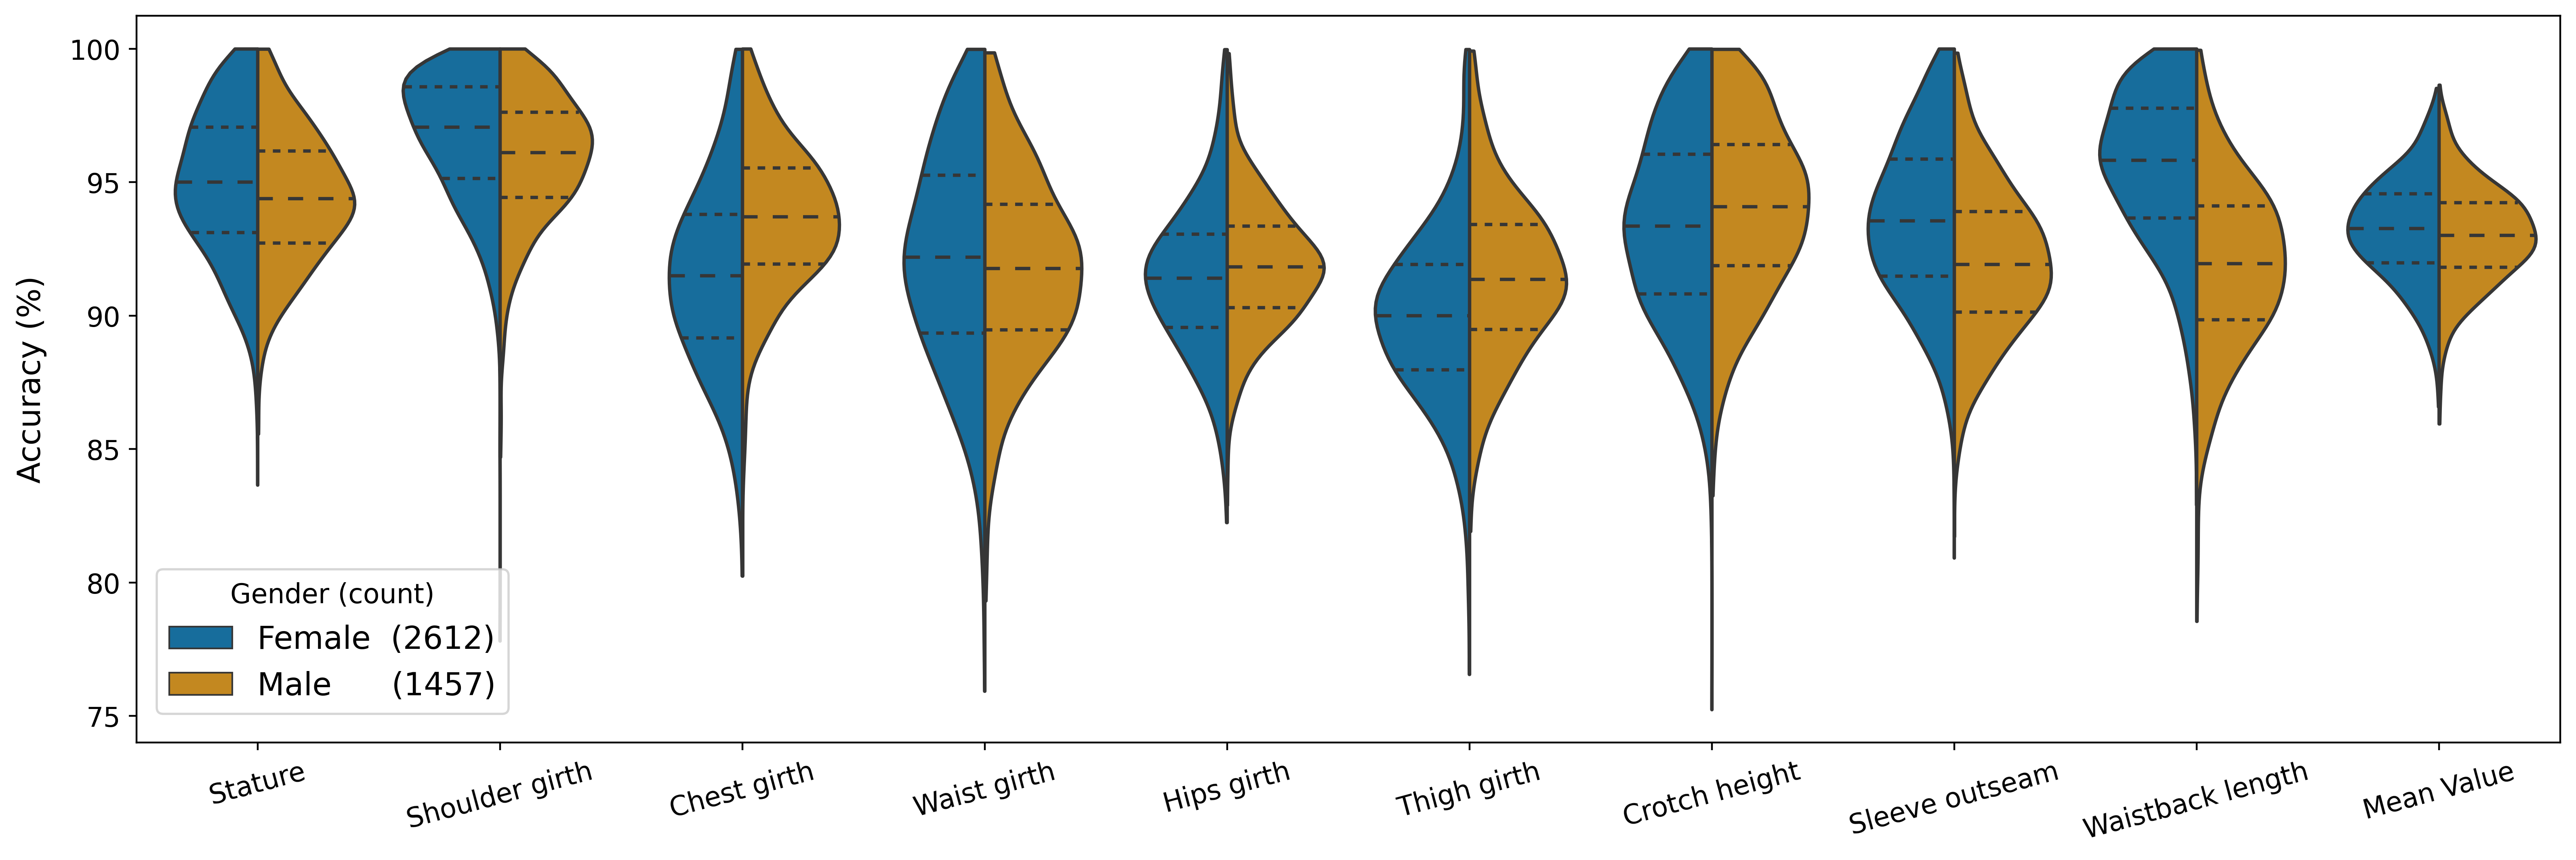

In [99]:
NEW_LABELS = { 'stature_cm': 'Stature', 
                'shoulder_girth': 'Shoulder girth',
                'chest_girth': 'Chest girth',
                'waist_girth': 'Waist girth',
                'hips_buttock_girth': 'Hips girth',
                'thigh_girth': 'Thigh girth',
                'crotchheight_length': 'Crotch height',
                'sleeveoutseam_length': 'Sleeve outseam',
                'waistback_length': 'Waistback length',
                'Mean Value': 'Mean Value'
            }

accuracy_female_list = [accuracy_female, accuracyNN_female]
accuracy_male_list = [accuracy_male, accuracyNN_male]

##Index 0-avatars generated, 1-extracted from NN
INDEX = 0

accuracy_fem = accuracy_female_list[INDEX]
accuracy_mal = accuracy_male_list[INDEX]

if INDEX == 0 and NUM_CAT == False and AUGMENTATION_Model == True:
    # Drop Stature_cm
    ## Avatars - generated
    df_female_ava_gen = df_female_ava_gen.drop('stature_cm', axis=1)
    df_male_ava_gen = df_male_ava_gen.drop('stature_cm', axis=1)


    ## NN - extracted
    df_female_nn_gen = df_female_nn_gen.drop('stature_cm', axis=1)
    df_male_nn_gen = df_male_nn_gen.drop('stature_cm', axis=1)


###############################
accuracy_fem = accuracy_fem.rename(columns=NEW_LABELS)
accuracy_mal = accuracy_mal.rename(columns=NEW_LABELS)


threshold = 98.0  # set the threshold value

sns.set(font_scale=1.0)

plt.style.use("default")

fig, ax = plt.subplots(figsize=(20,6), dpi=400)
plt.subplots_adjust(left=0.15, bottom=0.15, right=0.9, top=0.9)


accuracy_fem['Gender'] = f'Female  ({accuracy_fem.shape[0]})'
accuracy_mal['Gender'] = f'Male      ({accuracy_mal.shape[0]})'

accuracy_total = pd.concat([accuracy_fem, accuracy_mal])

accuracy_total_long = pd.melt(accuracy_total, id_vars=['Gender'], value_vars=NEW_LABELS.values(), var_name='Col', value_name='Value')

# # Add a horizontal line at y=98 and send it to the background
# plt.axhline(y=threshold, color='r', linestyle='-', lw=1.0, zorder=1)

# palette= ['#55A1E8', '#B2F6F0']
palette = sns.color_palette("colorblind")    #"bright"

##########################################################
sns.violinplot(data=accuracy_total_long, x='Col', y='Value', hue='Gender', split=True, 
               palette=palette,
               inner='quart', 
               bw=0.3, 
               scale='area',   #'count',
               cut=0,
            #    clip=[accuracy_total_long['Value'].quantile(0.49), accuracy_total_long['Value'].quantile(0.51)]
            )
##########################################################
plt.xlabel("")

plt.ylabel("Accuracy (%)",fontsize=14)
ax.yaxis.labelpad = 10

# Add a legend to the plot
legend = plt.legend(loc='upper right', bbox_to_anchor=(0.16, 0.26),fontsize=14)
# Add a title to the legend
legend.set_title("Gender (count)",  prop=FontProperties(size=12))

# increase tick label font size
plt.xticks(fontsize=12, rotation=15)
plt.yticks(fontsize=12)

if NUM_CAT == True and AUGMENTATION_Model == True:
    plt.savefig(f'benchmark-accuracy-violinplot_{FIT_ALG}.eps', format='eps',  bbox_inches='tight') 
elif NUM_CAT == False and AUGMENTATION_Model == True:
    plt.savefig(f'benchmark-accuracy-violinplot_{FIT_ALG}_noNumCat.eps', format='eps',  bbox_inches='tight') 

plt.show()


## Joint plots

In [100]:
# randomly select a subset of rows from the larger array
random_indices = np.random.choice(accuracy_female.shape[0], size=accuracy_male.shape[0], replace=False)
# Select random rows from accuracy_female using .iloc
accuracy_female_sub = accuracy_female.iloc[random_indices, :].copy()

# accuracy_female.hist()
# accuracy_female_sub.hist()

# display (
#     accuracy_female.shape,
#     accuracy_female_sub.shape,
# )

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


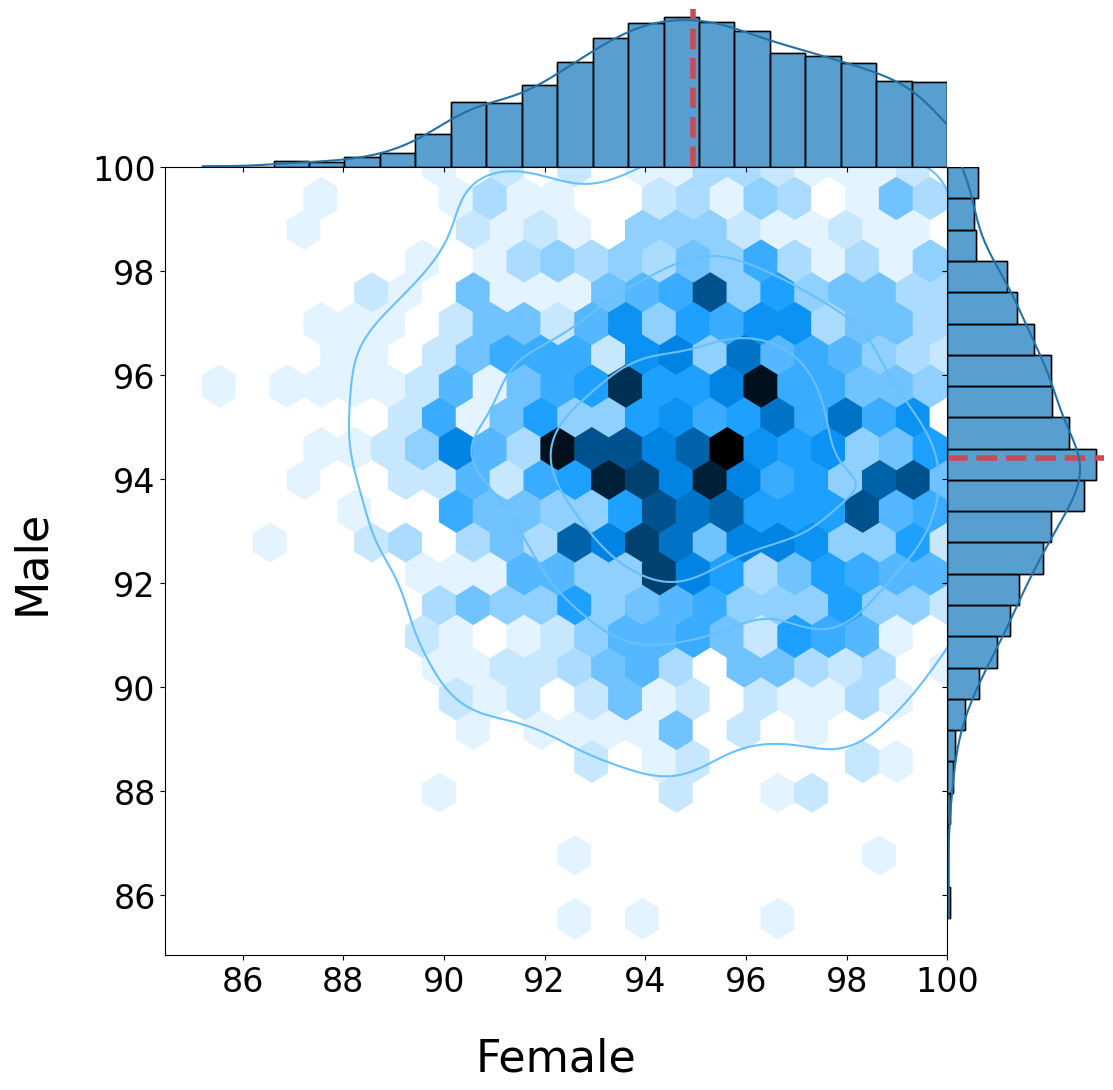

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


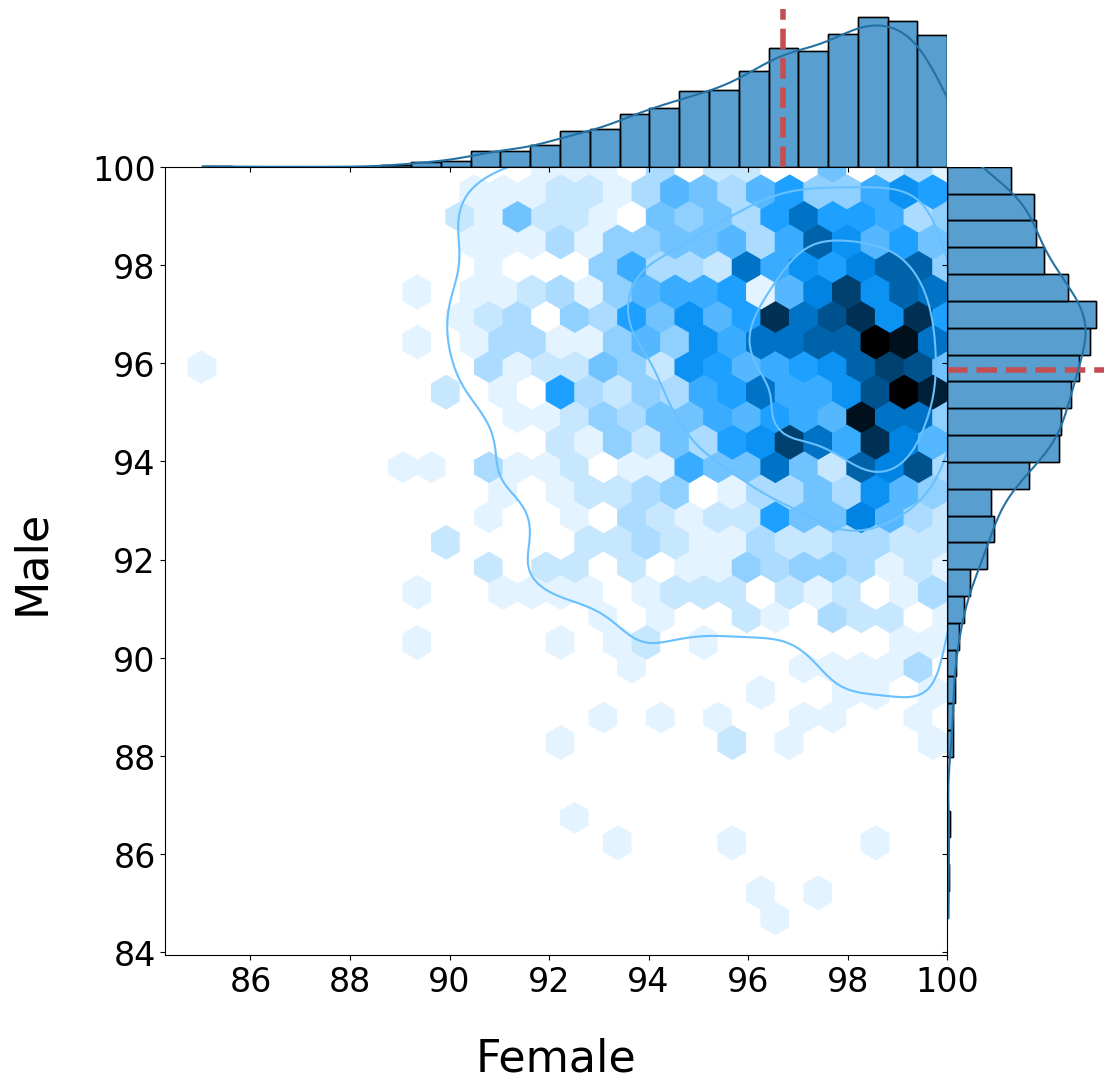

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


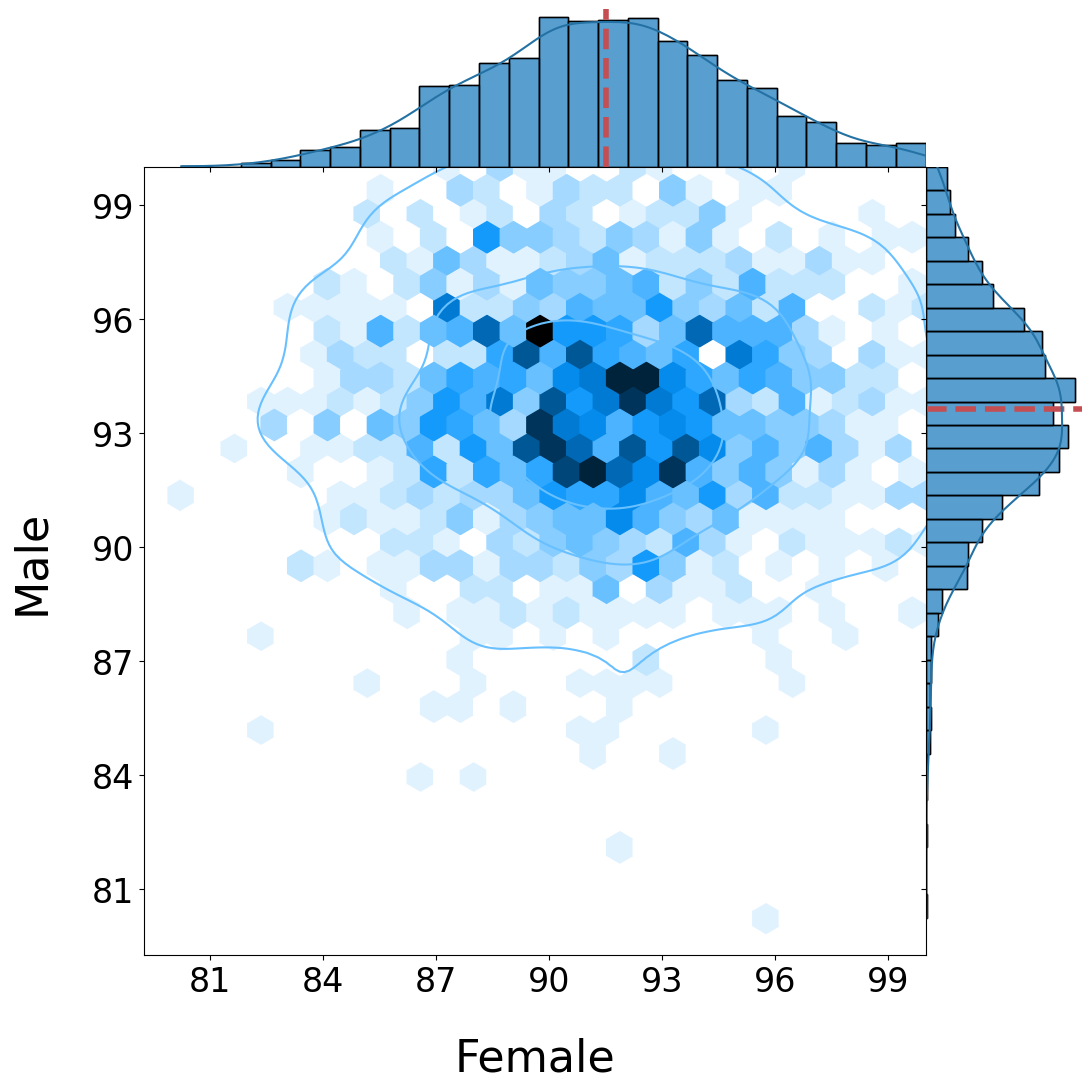

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


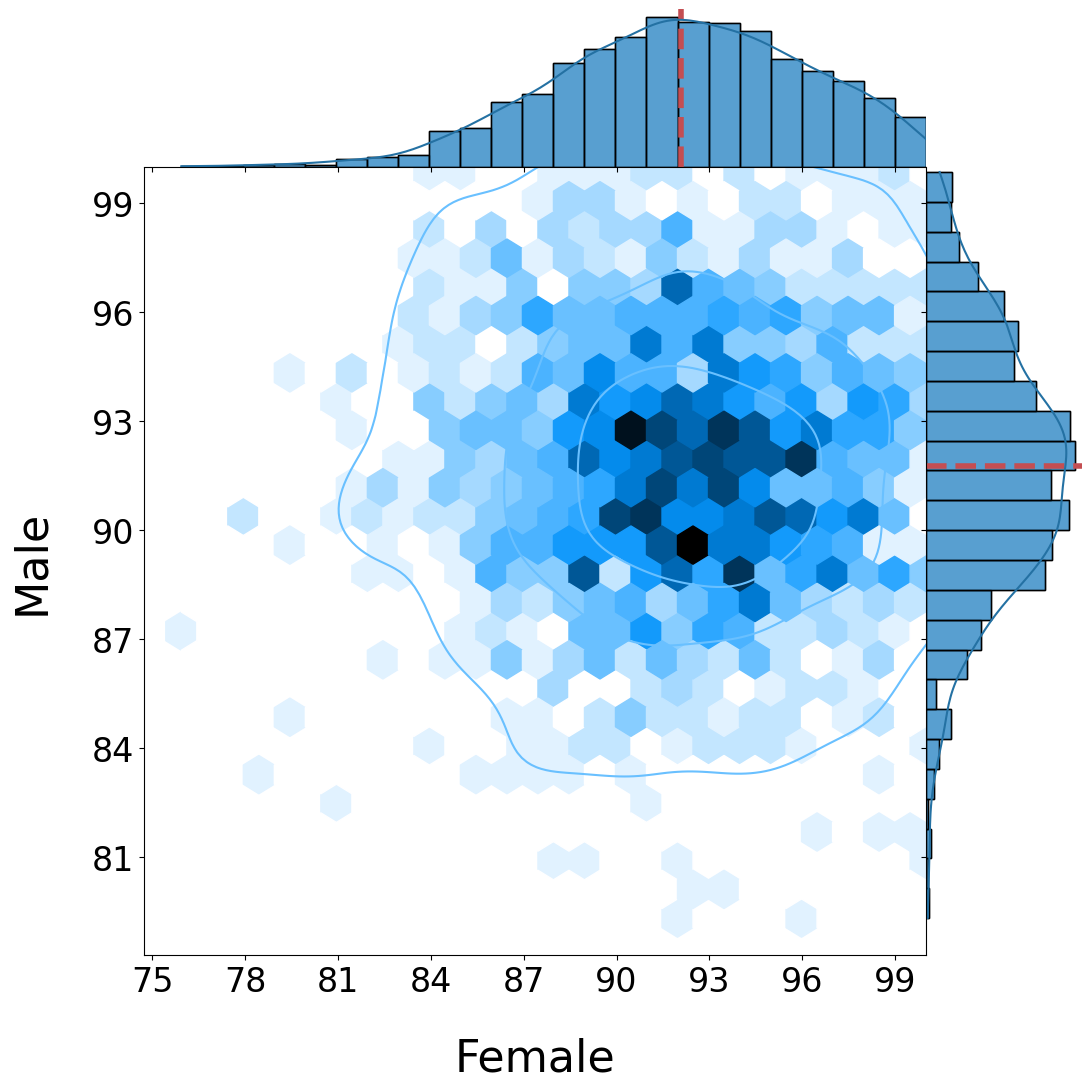

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


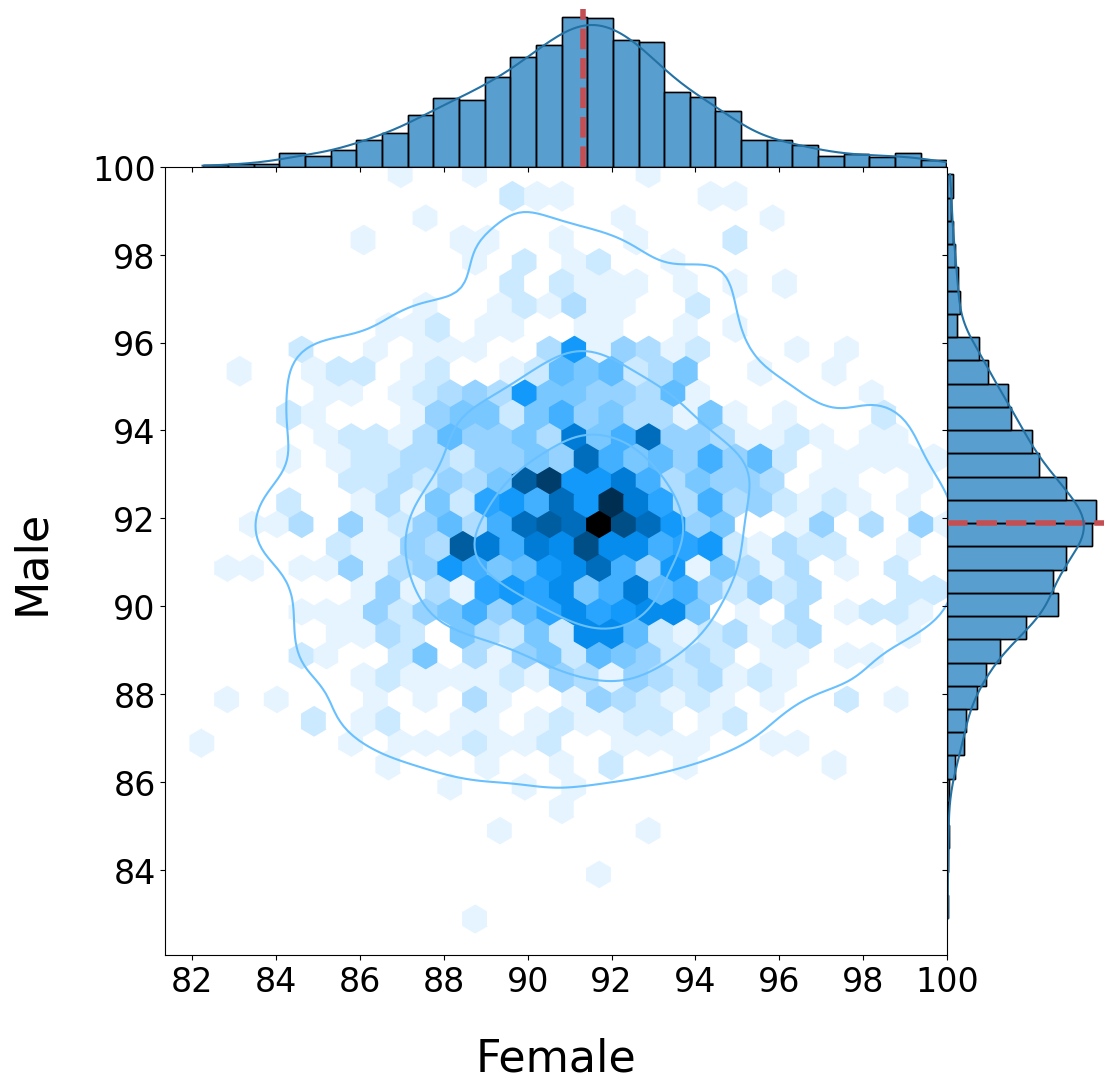

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


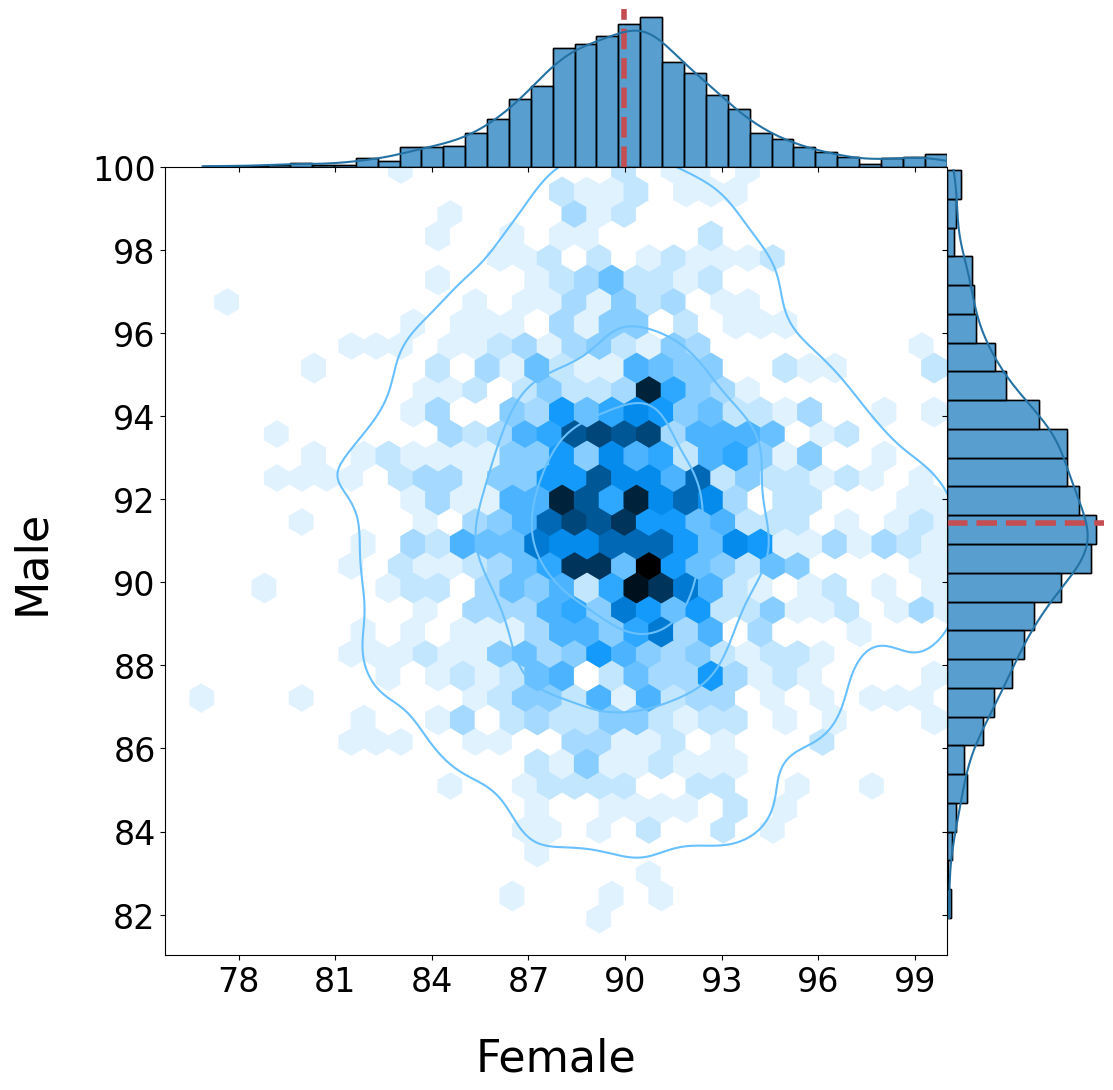

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


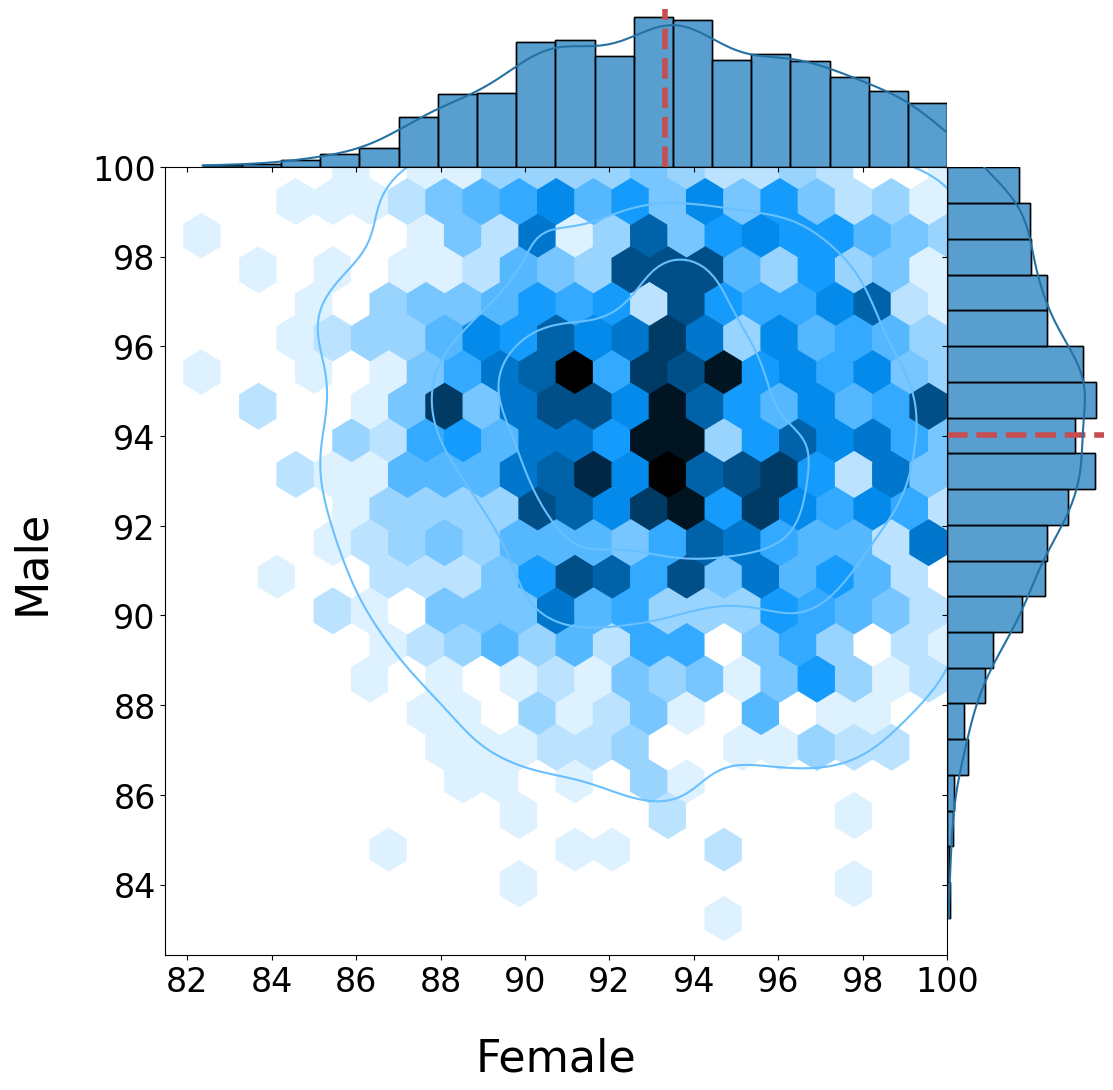

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


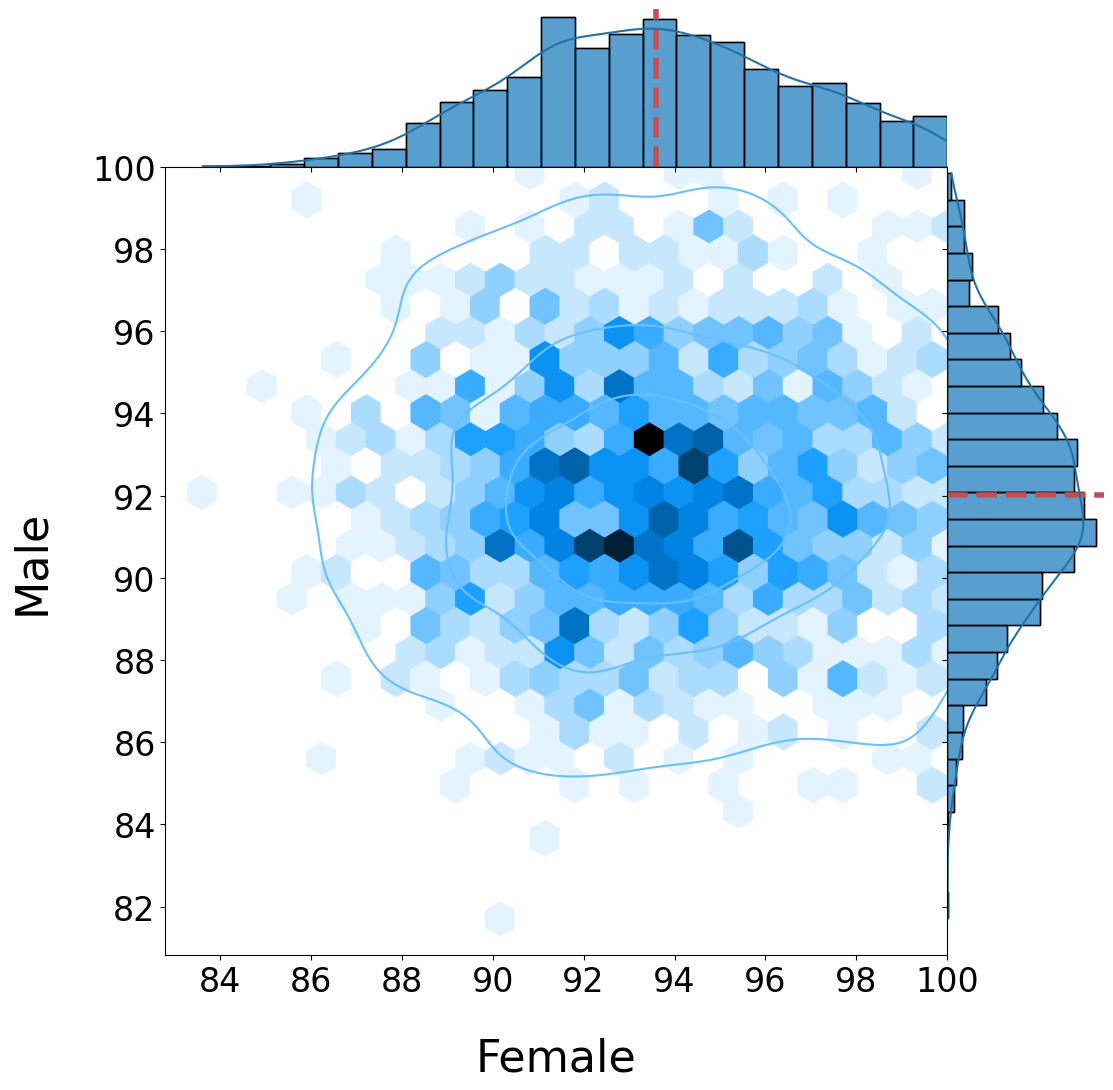

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


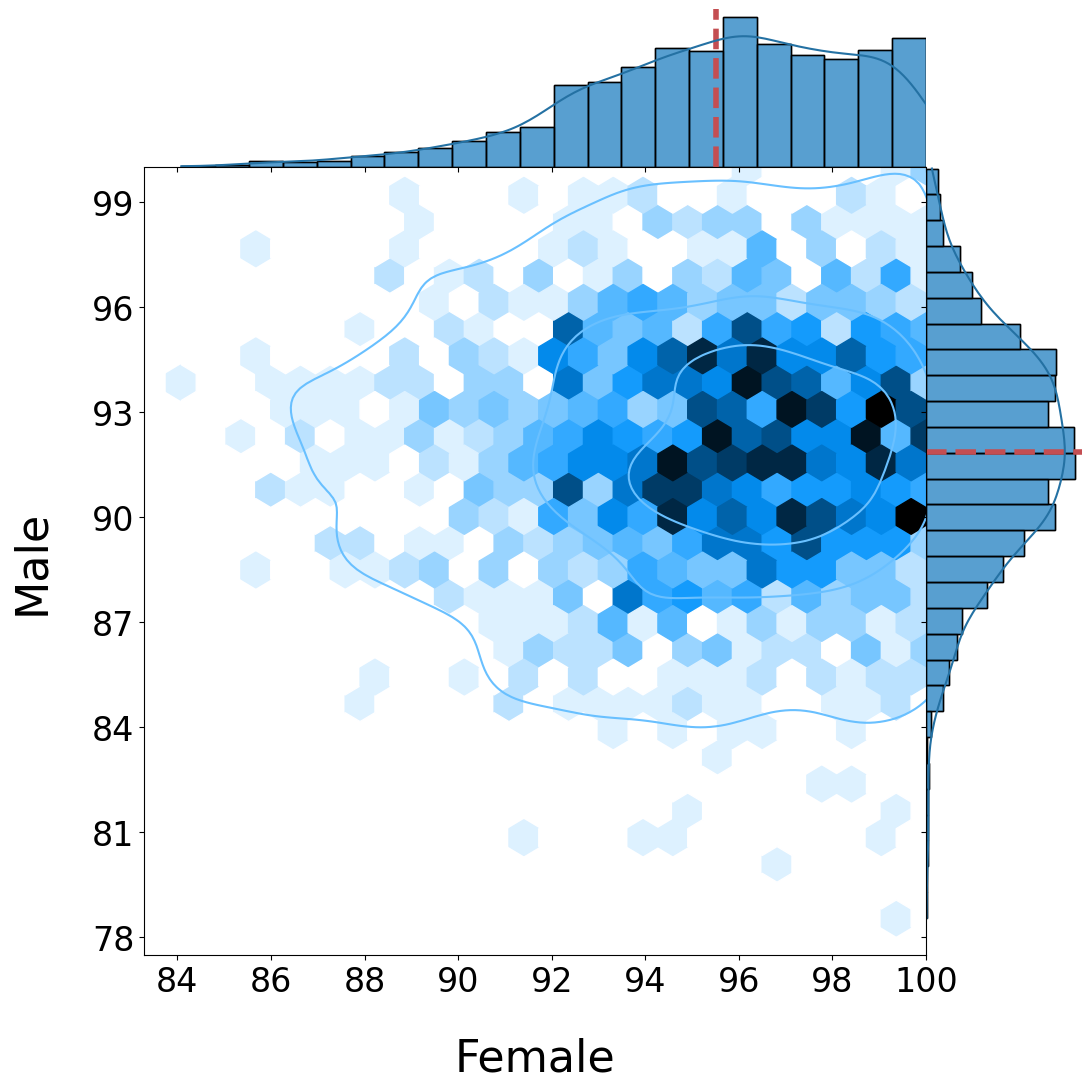

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


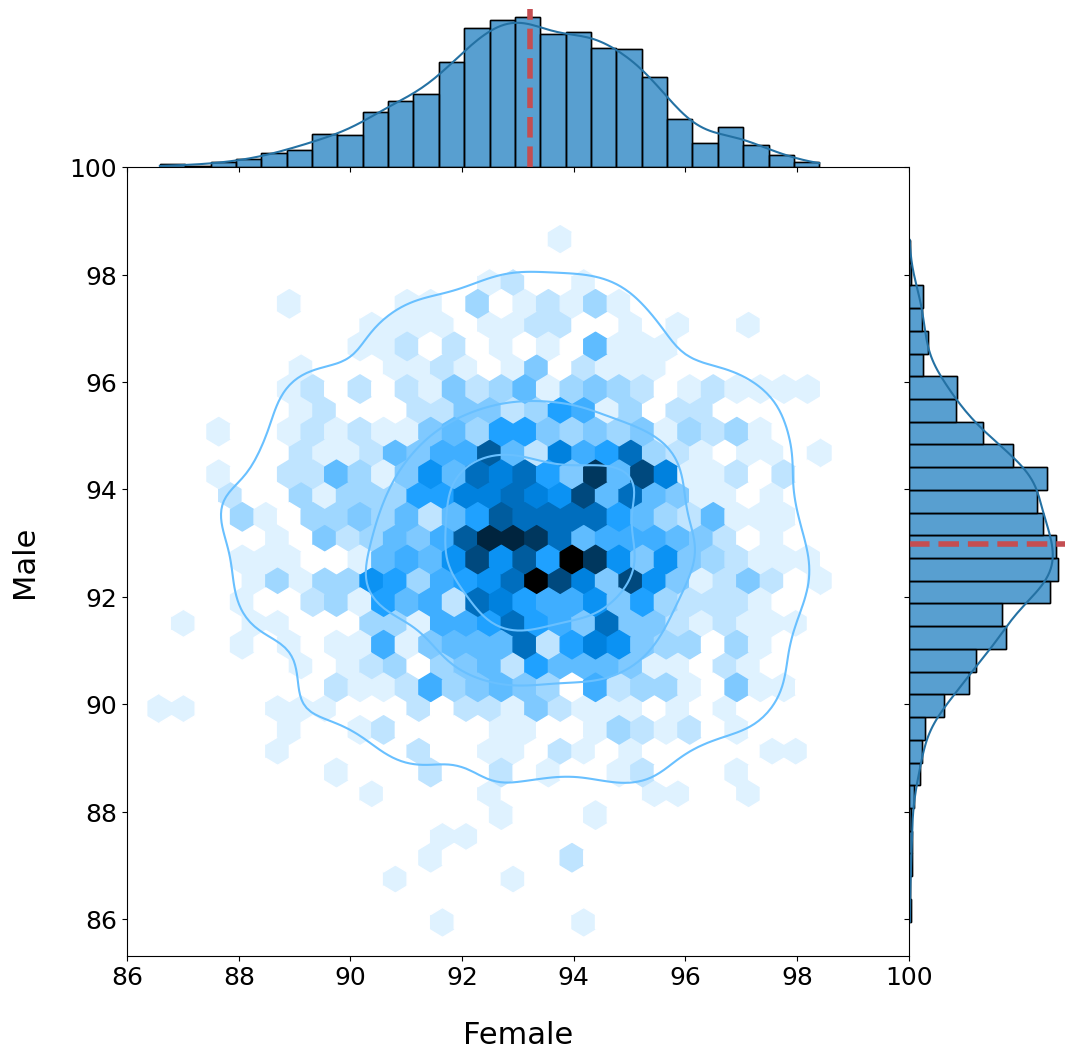

In [101]:
# accuracy_female[list(NEW_LABELS.values())[:-1]]

# Rename the columns of the DataFrame
accuracy_female_sub = accuracy_female_sub.rename(columns=NEW_LABELS)
accuracy_male = accuracy_male.rename(columns=NEW_LABELS)

accuracy_female_joint = accuracy_female_sub[list(NEW_LABELS.values())]
accuracy_male_joint = accuracy_male[list(NEW_LABELS.values())]

# # # Rename columns in joint dataframes
# # accuracy_female_joint.columns = new_col_names[:len(accuracy_female_joint.columns)]
# # accuracy_male_joint.columns = new_col_names[len(accuracy_female_joint.columns):]

for col in accuracy_female_joint.columns:

    # Calculate means of Mean Value column for each joint dataframe
    mean_fem = np.array(accuracy_female_joint[col])
    mean_mal = np.array(accuracy_male_joint[col])

    # Create joint plot of mean values
    g = sns.jointplot(x=mean_fem, y=mean_mal, 
                kind='hex', 
                space=0, 
                color="#69C0FF", 
                height=10,
                #   ratio=5,
                )
    
    # Set up integer axis ticks
    g.ax_joint.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
    g.ax_joint.yaxis.set_major_locator(ticker.MaxNLocator(integer=True))

    # Set y-axis limit to 100
    g.ax_joint.set_xlim(right=100)
    g.ax_joint.set_ylim(top=100)
    
    # # Set up legend for the color scale
    # cbar_ax = g.fig.add_axes([1, 0.15, 0.05, 0.7])
    # cb = plt.colorbar(cax=cbar_ax)
    # cb.set_label('Concentration', fontsize=14)

    # get the histogram axes
    hist_ax_x = g.ax_marg_x
    hist_ax_y = g.ax_marg_y

    # plot vertical lines at the mean values
    mean1_mean = sum(mean_fem)/len(mean_fem)
    mean2_mean = sum(mean_mal)/len(mean_mal)
    hist_ax_x.axvline(mean1_mean, color='r', linestyle='--', linewidth=4)
    hist_ax_y.axhline(mean2_mean, color='r', linestyle='--', linewidth=4)

    g.plot_joint(sns.kdeplot, 
                color="#69C0FF",   #"b", 
                zorder=1, levels=4)

    g.plot_marginals(sns.histplot, kde=True, color="#2471A3", line_kws={'color': '#69C0FF'})
    
    # # Set the axis limits
    # plt.ylim(int(np.min(mean_mal)), int(np.max(mean_mal)))
    # plt.xlim(int(np.min(mean_fem)), int(np.max(mean_fem)))

    if col == "Mean Value":
        # Increase tick label font size and add labelpad
        plt.yticks(fontsize=18)
        plt.xticks(fontsize=18)

        plt.ylabel("Male", fontsize=22, labelpad=22)
        plt.xlabel("Female", fontsize=22, labelpad=22)

        if NUM_CAT == True and AUGMENTATION_Model == True:
            plt.savefig(f'benchmark-accuracy-jointplot-meanvalue_{FIT_ALG}.eps', format='eps',  bbox_inches='tight') 
        elif NUM_CAT == False and AUGMENTATION_Model == True:
            plt.savefig(f'benchmark-accuracy-jointplot-meanvalue_{FIT_ALG}_noNumCat.eps', format='eps',  bbox_inches='tight') 

    else:
        # Increase tick label font size and add labelpad
        plt.yticks(fontsize=24)
        plt.xticks(fontsize=24)

        plt.ylabel("Male", fontsize=32, labelpad=28)
        plt.xlabel("Female", fontsize=32, labelpad=28)

        key = [k for k, v in NEW_LABELS.items() if v == col]
        if NUM_CAT == True and AUGMENTATION_Model == True:
            plt.savefig(f'benchmark-accuracy-jointplot-{key[0]}_{FIT_ALG}.eps', format='eps',  bbox_inches='tight') 
        elif NUM_CAT == False and AUGMENTATION_Model == True:
            plt.savefig(f'benchmark-accuracy-jointplot-{key[0]}_{FIT_ALG}_noNumCat.eps', format='eps',  bbox_inches='tight') 

    # # Create the legend and set its location and font size
    # legend = plt.legend(loc='lower left', fontsize=14)
    # # Set the title for the legend and adjust its font size
    # legend.set_title(col, prop={'size': 16})
    # # Remove the border around the legend
    # legend.get_frame().set_linewidth(0.0)

    plt.show()

## Quantiles

In [102]:
quantiles = [0.05,  0.25, 0.5,  0.75, 0.95]


# Drop the "Gender" column and save the result to a new DataFrame
accuracy_female_without_gender = accuracy_female.drop('Gender', axis=1)
accuracy_male_without_gender = accuracy_male.drop('Gender', axis=1)

# Define the file names for the output CSV files
output_filenames = [f'benchmark-accuracy-quantiles_{FIT_ALG}_female.csv', 
                    f'benchmark-accuracy-quantiles_{FIT_ALG}_male.csv']


# Define the DataFrames
dfs = [accuracy_female_without_gender, accuracy_male_without_gender]

# Loop through each DataFrame and save the quantiles to a CSV file
for i in range(len(dfs)):
    # Calculate the quantiles for each DataFrame column
    quantile_table = dfs[i].quantile(q=quantiles, axis=0)
    
    # Add a column for the quantile names
    quantile_table.insert(loc=0, column='Quantile', value=quantiles)

    # # # Round the values in the table to one decimal place
    # # quantile_table = quantile_table.round(2)

    # Round the values in the table to one decimal place for all columns except the first one
    column_decimals = {'Quantile': 2}
    for column_name in quantile_table.columns[1:]:
        column_decimals[column_name] = 1
    quantile_table = quantile_table.round(column_decimals)
    
    # Save the table as a CSV file
    quantile_table.to_csv(output_filenames[i], index=False)


# Calculate the quantiles for each DataFrame column and concatenate the results
quantile_tables = [df.quantile(q=quantiles, axis=0).round(2) for df in dfs]
merged_table = pd.concat(quantile_tables, axis=1, keys=['Female', 'Male'])

# Add a column for the quantile names
merged_table.insert(loc=0, column='Quantile', value=quantiles)

# Save the tables as CSV files
merged_table.to_csv(f'benchmark-accuracy-quantiles_{FIT_ALG}_merged.csv', index=False)


KeyError: "['Gender'] not found in axis"

## Line plots

In [ ]:
# display(
#     ## Avatars - benchmark
#     df_female_ava_bm.head(5),
#     df_male_ava_bm.head(5),

#     ## Avatars - generated
#     df_female_ava_gen.head(5),
#     df_male_ava_gen.head(5),
# )

In [ ]:
# # sort df_female_ava_bm by the "stature" column
# df_female_ava_bm_sorted = df_female_ava_bm.sort_values("stature_cm", ascending=False)
# df_male_ava_bm_sorted = df_male_ava_bm.sort_values("stature_cm", ascending=False)

# # reorder df_female_ava_gen by the new index in df_female_ava_bm
# df_female_ava_gen_sorted = df_female_ava_gen.reindex(df_female_ava_bm_sorted.index)
# df_male_ava_gen_sorted = df_male_ava_gen.reindex(df_male_ava_bm_sorted.index)

# display(
#     df_female_ava_bm_sorted.head(5),
#     df_female_ava_gen_sorted.head(5),
#     df_male_ava_bm_sorted.head(5),
#     df_male_ava_gen_sorted.head(5),
# )


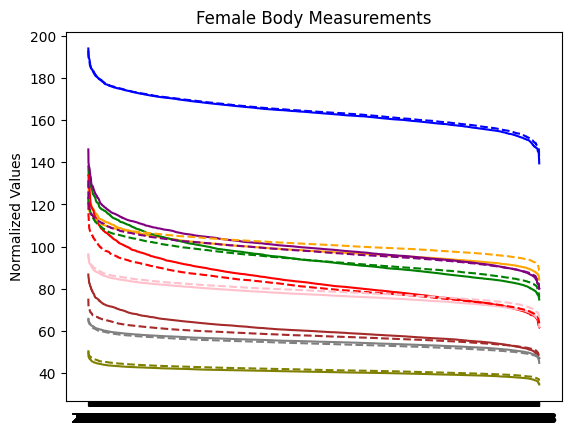

In [ ]:
# sort df_female_ava_bm by stature
df_female_ava_bm_sorted = df_female_ava_bm.sort_values("stature_cm", ascending=False)

# sort df_female_ava_gen by the new index
df_female_ava_gen_sorted = df_female_ava_gen.reindex(df_female_ava_bm_sorted.index)

# set the color scheme
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive']

# plot each column of df_female_ava_bm_sorted with solid line
for i, col in enumerate(df_female_ava_bm_sorted.columns[1:]):
    col_sorted = df_female_ava_bm_sorted.sort_values(col, ascending=False)[[col]]
    col_sorted = col_sorted.values
    # # normalize the data to fit in the same plot
    # min_val = col_sorted.min()
    # max_val = col_sorted.max()
    # col_sorted_norm = (col_sorted - min_val) / (max_val - min_val)
    col_sorted_norm = col_sorted

    plt.plot(col_sorted_norm, color=colors[i], linestyle='solid')

# plot each column of df_female_ava_gen_sorted with dashed line, using the same color as the corresponding column in df_female_ava_bm_sorted
for i, col in enumerate(df_female_ava_gen_sorted.columns[1:]):
    col_sorted = df_female_ava_gen_sorted.sort_values(col, ascending=False)[[col]]
    col_sorted = col_sorted.values
    # # normalize the data to fit in the same plot
    # min_val = col_sorted.min()
    # max_val = col_sorted.max()
    # col_sorted_norm = (col_sorted - min_val) / (max_val - min_val)
    col_sorted_norm = col_sorted

    plt.plot(col_sorted_norm, color=colors[i], linestyle='dashed')
    
# set the x-axis tick labels to the row indices of df_female_ava_bm_sorted
plt.xticks(range(len(df_female_ava_bm_sorted.index)), df_female_ava_bm_sorted.index)

# display every 100th x-axis tick label
for label in plt.gca().xaxis.get_ticklabels()[::100]:
    label.set_visible(False)

# set the y-axis label to 'Normalized Values'
plt.ylabel('Normalized Values')

# set the title
plt.title('Female Body Measurements')

# show the plot
plt.show()



In [ ]:
# sort df_female_ava_bm by stature
df_female_ava_bm_sorted = df_female_ava_bm.sort_values("stature_cm", ascending=False)

# sort df_female_ava_gen by the new index
df_female_ava_gen_sorted = df_female_ava_gen.reindex(df_female_ava_bm_sorted.index)

# set the color scheme
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive']


# create a grid of subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 8))

# iterate over each pair of columns
# plot each column of df_female_ava_bm_sorted with solid line
for i, col_name in enumerate(df_female_ava_bm_sorted.columns[1:]):

    row = i // 3
    col = i % 3
    ax = axes[row, col]


    col_sorted = df_female_ava_bm_sorted.sort_values(col_name, ascending=False)[[col_name]]
    col_sorted = col_sorted.values
    # # normalize the data to fit in the same plot
    # min_val = col_sorted.min()
    # max_val = col_sorted.max()
    # col_sorted_norm = (col_sorted - min_val) / (max_val - min_val)
    col_sorted_norm = col_sorted

    ax.plot(col_sorted_norm, color=colors[i], linestyle='solid')
    
    


    # # plot the sorted data for the body measurements column with solid line
    # col_sorted = df_female_ava_bm_sorted.sort_values(bm_col, ascending=False)[[bm_col]]
    # col_sorted_norm = col_sorted.values
    # ax.plot(col_sorted_norm, color=colors[i], linestyle='solid')

    # # plot the sorted data for the general measurements column with dashed line
    # col_sorted = df_female_ava_gen_sorted.sort_values(gen_col, ascending=False)[[gen_col]]
    # col_sorted_norm = col_sorted.values
    # ax.plot(col_sorted_norm, color=colors[i], linestyle='dashed')

    # set the x-axis labels to the row indices
    ax.set_xticks(range(len(df_female_ava_bm_sorted.index)))
    ax.set_xticklabels(df_female_ava_bm_sorted.index)

    # # set the y-axis label to 'Normalized Values'
    # ax.set_ylabel('Normalized Values')

    # set the title
    ax.set_title(f'{col_name}')

# adjust the space between subplots
fig.tight_layout()

# show the plot
plt.show()



KeyboardInterrupt: 

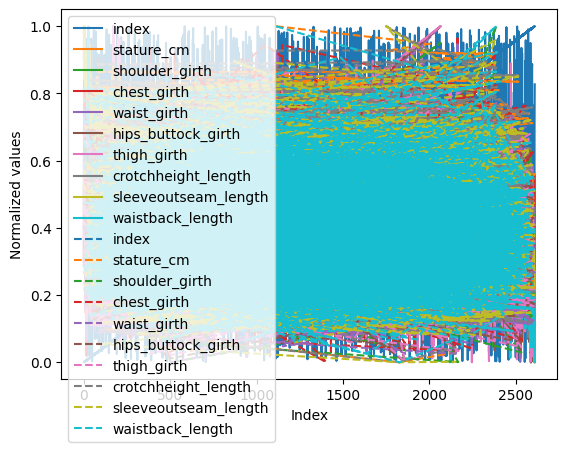

In [ ]:
# # Normalize the data
# df_normalized = (df_female_ava_bm_sorted - df_female_ava_bm_sorted.min()) / (df_female_ava_bm_sorted.max() - df_female_ava_bm_sorted.min())

# # Plot the data
# plt.plot(df_normalized.values, linestyle='solid')
# plt.plot((df_female_ava_gen_sorted.loc[df_female_ava_bm_sorted.index] - df_female_ava_gen_sorted.min()) / (df_female_ava_gen_sorted.max() - df_female_ava_gen_sorted.min()), linestyle='dashed')
# plt.legend(df_normalized.columns.tolist() + df_female_ava_gen_sorted.columns.tolist(), loc='upper left')
# plt.xlabel('Index')
# plt.ylabel('Normalized values')
# plt.show()

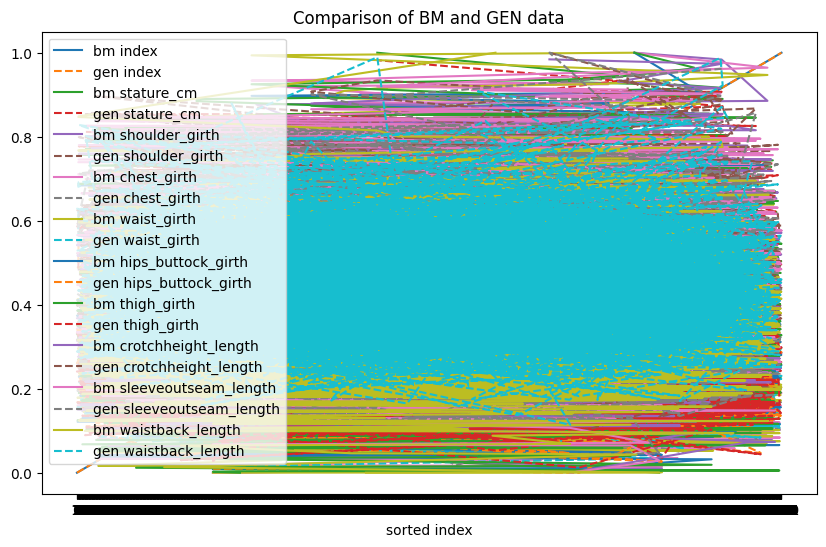

In [ ]:
# display(
#     ## Avatars - benchmark
#     df_female_ava_bm.head(5),
#     df_male_ava_bm.head(5),

#     ## Avatars - generated
#     df_female_ava_gen.head(5),
#     df_male_ava_gen.head(5),
# )

# create a list of column names
columns = list(df_female_ava_bm.columns)

# create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 6))

# loop through each column and plot the data
for col in columns:
    # sort the index based on the bm data
    sorted_index = df_female_ava_bm[col].sort_values().index

    # get the sorted bm and gen data
    df_female_ava_bm_sorted = df_female_ava_bm.loc[sorted_index, col]
    df_female_ava_gen_sorted = df_female_ava_gen.loc[sorted_index, col]

    # normalize the data to fit in the same plot
    min_val = min(df_female_ava_bm_sorted.min(), df_female_ava_gen_sorted.min())
    max_val = max(df_female_ava_bm_sorted.max(), df_female_ava_gen_sorted.max())
    df_female_ava_bm_norm = (df_female_ava_bm_sorted - min_val) / (max_val - min_val)
    df_female_ava_gen_norm = (df_female_ava_gen_sorted - min_val) / (max_val - min_val)

    # plot the data for the current column
    ax.plot(df_female_ava_bm_norm, label='bm ' + col, linestyle='solid')
    ax.plot(df_female_ava_gen_norm, label='gen ' + col, linestyle='dashed')

# set the x-axis label and title
ax.set_xlabel('sorted index')
ax.set_title('Comparison of BM and GEN data')

# reorder the x-axis ticks based on the sorted bm data
sorted_index_ticks = df_female_ava_bm[columns[0]].sort_values().index
ax.set_xticks(range(len(sorted_index_ticks)))
ax.set_xticklabels(sorted_index_ticks)

# add a legend
ax.legend()


